## Exploratory Analysis
Exploration starts with univariate visualizations to identify trends in distribution and outliers in single variables. Bivariate visualizations follow, to show relationships between variables in the data. Finally, multivariate visualization techniques are presented to identify complex relationships between three or more variables at the same time.

- Look for relationships 
- connect questions about data
- visualization don't need to be perfect


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('csa-extract.csv')
cols = ['Type_of_Breach','Summary','State','Individuals_Affected','Name_of_Covered_Entity'
        ,'Location_of_Breached_Information','year','Date_Posted_or_Updated']

In [3]:
year_order = df['year'].value_counts().index
state_order = df['State'].value_counts().index
attack_order = df['Type_of_Breach'].value_counts().index

In [4]:
df = df[cols].reset_index(drop=True)
df =df.loc[df['year']>2006]
df =df.loc[df['State'].isin(state_order[:20])]
# breaches = df.Type_of_Breach.value_counts()[:6].index
df = df.loc[df['Type_of_Breach'].isin(attack_order[:6])]
df['Summary'] = df['Summary'].fillna('No Summary')

In [5]:
df.shape

(718, 8)

In [6]:
df.describe()

,Individuals_Affected,year
count,7.180000e+02,718.000000
mean,2.691706e+04,2011.518106
std,1.880920e+05,1.387966
min,5.000000e+02,2007.000000
25%,1.000000e+03,2010.000000
50%,2.262500e+03,2012.000000
75%,6.658750e+03,2013.000000
max,4.029530e+06,2014.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 1054
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Type_of_Breach                    718 non-null    object
 1   Summary                           718 non-null    object
 2   State                             718 non-null    object
 3   Individuals_Affected              718 non-null    int64 
 4   Name_of_Covered_Entity            718 non-null    object
 5   Location_of_Breached_Information  718 non-null    object
 6   year                              718 non-null    int64 
 7   Date_Posted_or_Updated            718 non-null    object
dtypes: int64(2), object(6)
memory usage: 50.5+ KB


# Explore

## Univariate

- Which year has the highest number of attacks?
- What is the most common cyber-attack?
- What is the most reported cyber-attack state?

In [8]:
base_color = sb.color_palette()[0]
year_order = df['year'].value_counts().index
state_order = df['State'].value_counts().index
attack_order = df['Type_of_Breach'].value_counts().index

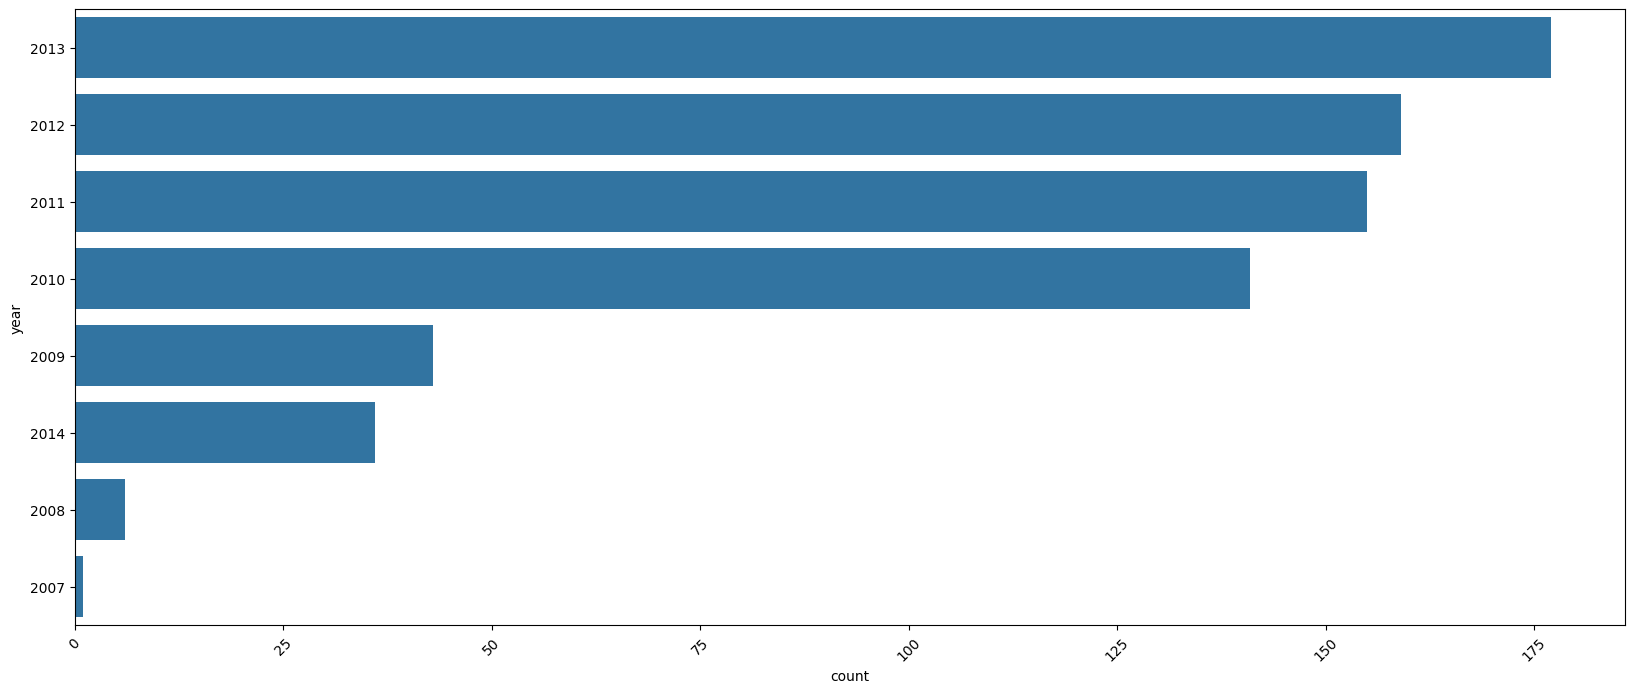

In [9]:
plt.figure(figsize=(20,8))
sb.countplot(data=df,y='year',color=base_color,order=year_order)
plt.xticks(rotation=45);

### 2013 has the  highest number of attacks

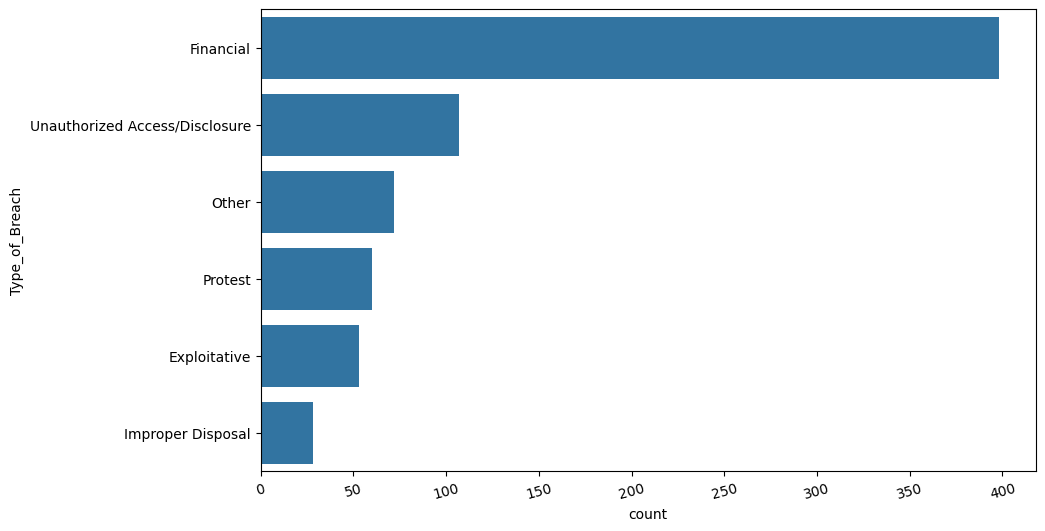

In [10]:
plt.figure(figsize=(10,6))
sb.countplot(data=df,y='Type_of_Breach',color=base_color,order=attack_order)
plt.xticks(rotation=15);

### Theft is the most common attack

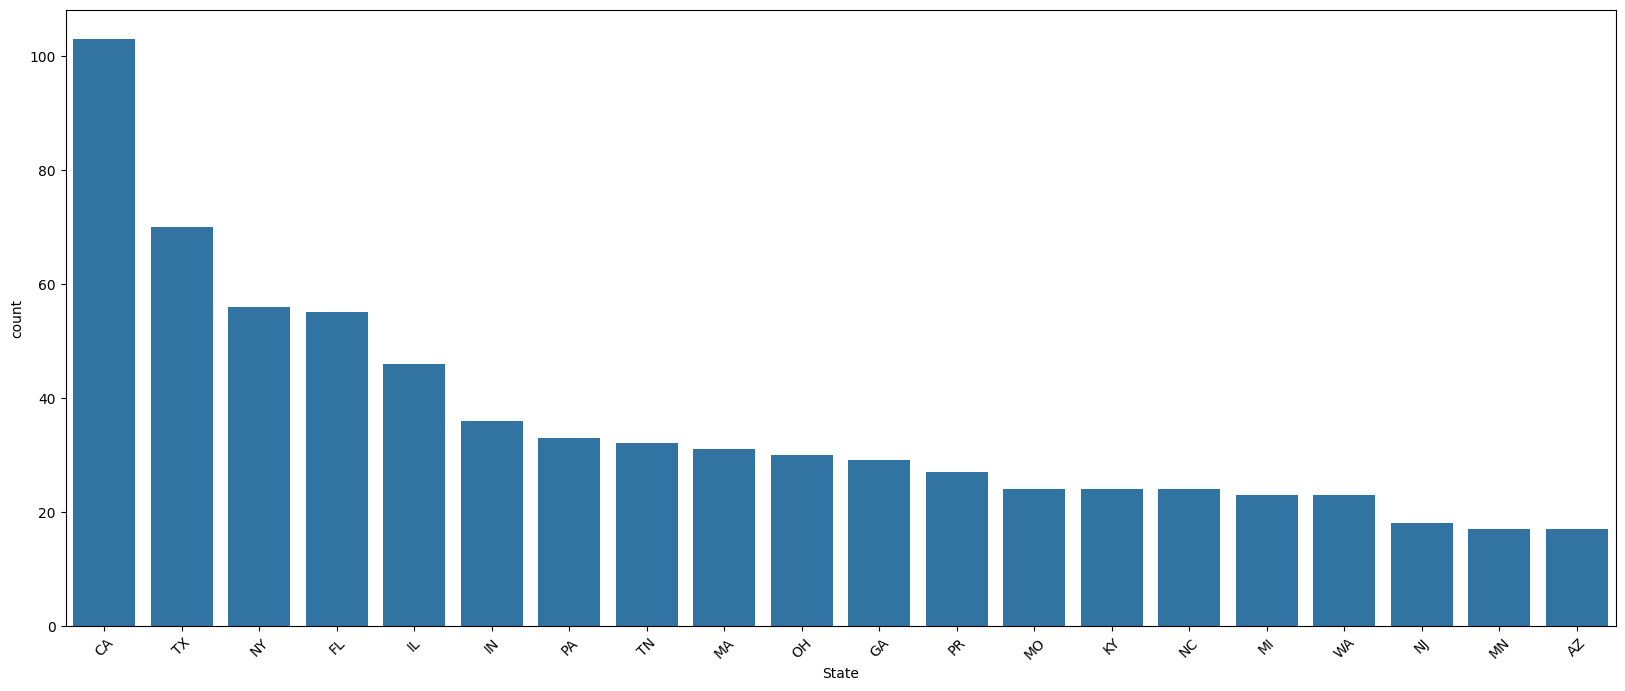

In [12]:
plt.figure(figsize=(20,8))
sb.countplot(data=df,x='State',color=base_color,order=state_order)
plt.xticks(rotation=45);

### California is the most reported cyber-attack state

## Bi-variate
- What is the relation between the year and Individuals Affected ?
- What is the relation between the year and the cyber-attack?

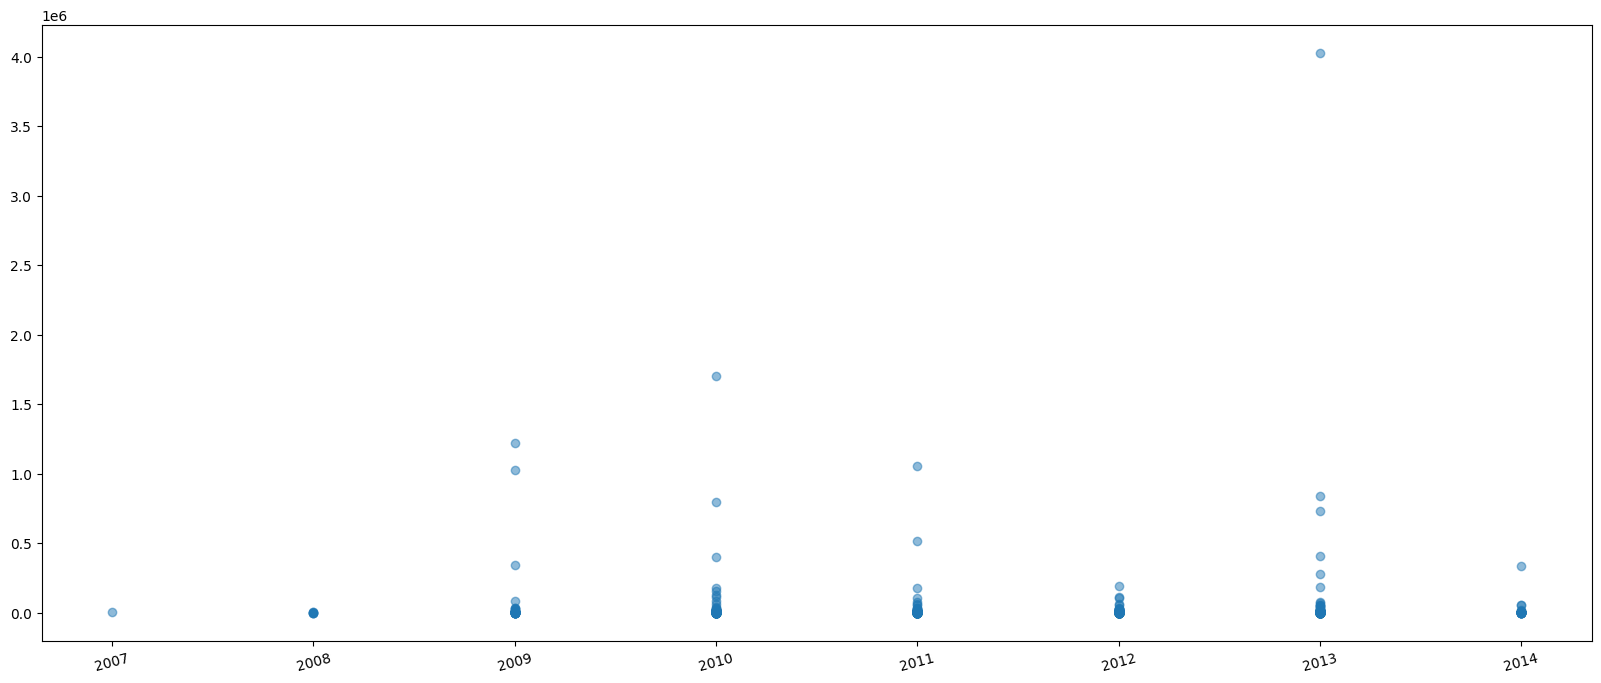

In [13]:
plt.figure(figsize=(20,8))
plt.scatter(data = df, y = 'Individuals_Affected', x = 'year', alpha=1/2)
plt.xticks(rotation=15);

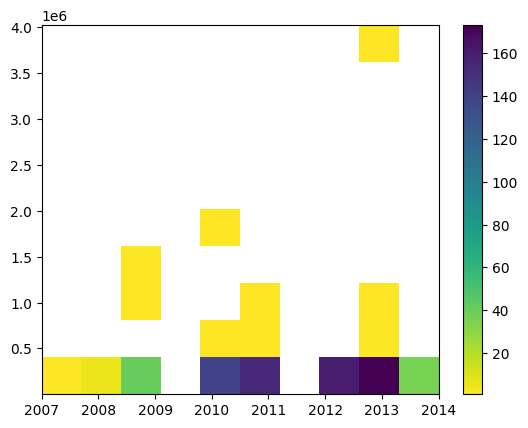

In [14]:
plt.hist2d(data = df, y = 'Individuals_Affected', x = 'year',cmin=0.5,cmap = 'viridis_r')
plt.colorbar();

### Although no strong relationship, but tends to be positive relationship.

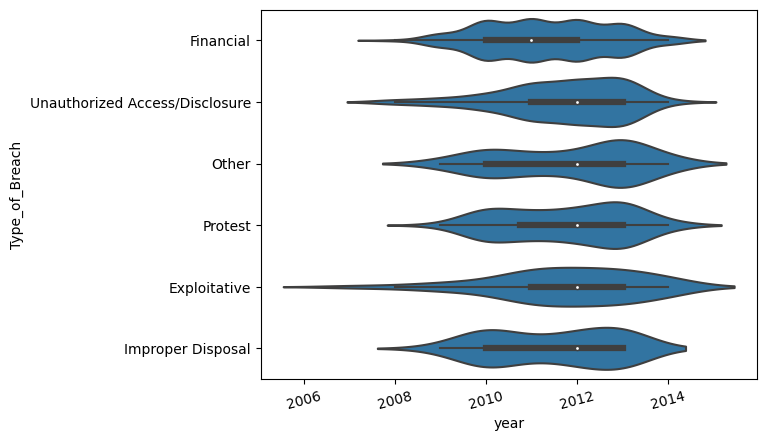

In [15]:
sb.violinplot(data=df, y='Type_of_Breach', x='year', color=base_color, innner=None,
              order=attack_order)
plt.xticks(rotation=15);

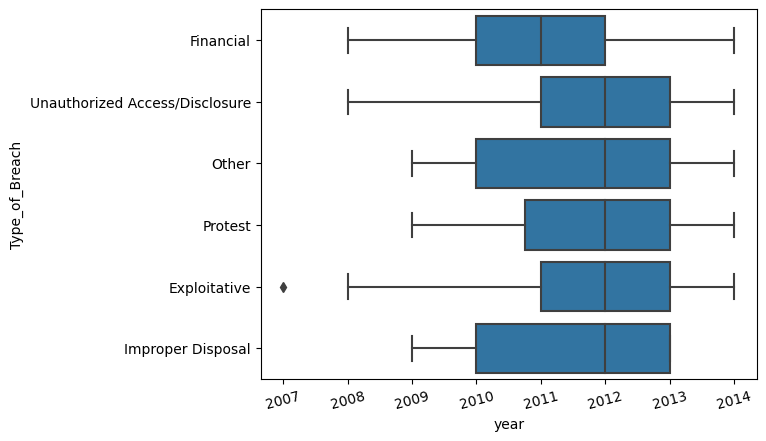

In [16]:
sb.boxplot(data=df, y='Type_of_Breach', x='year', color=base_color,order=attack_order)
plt.xticks(rotation=15);

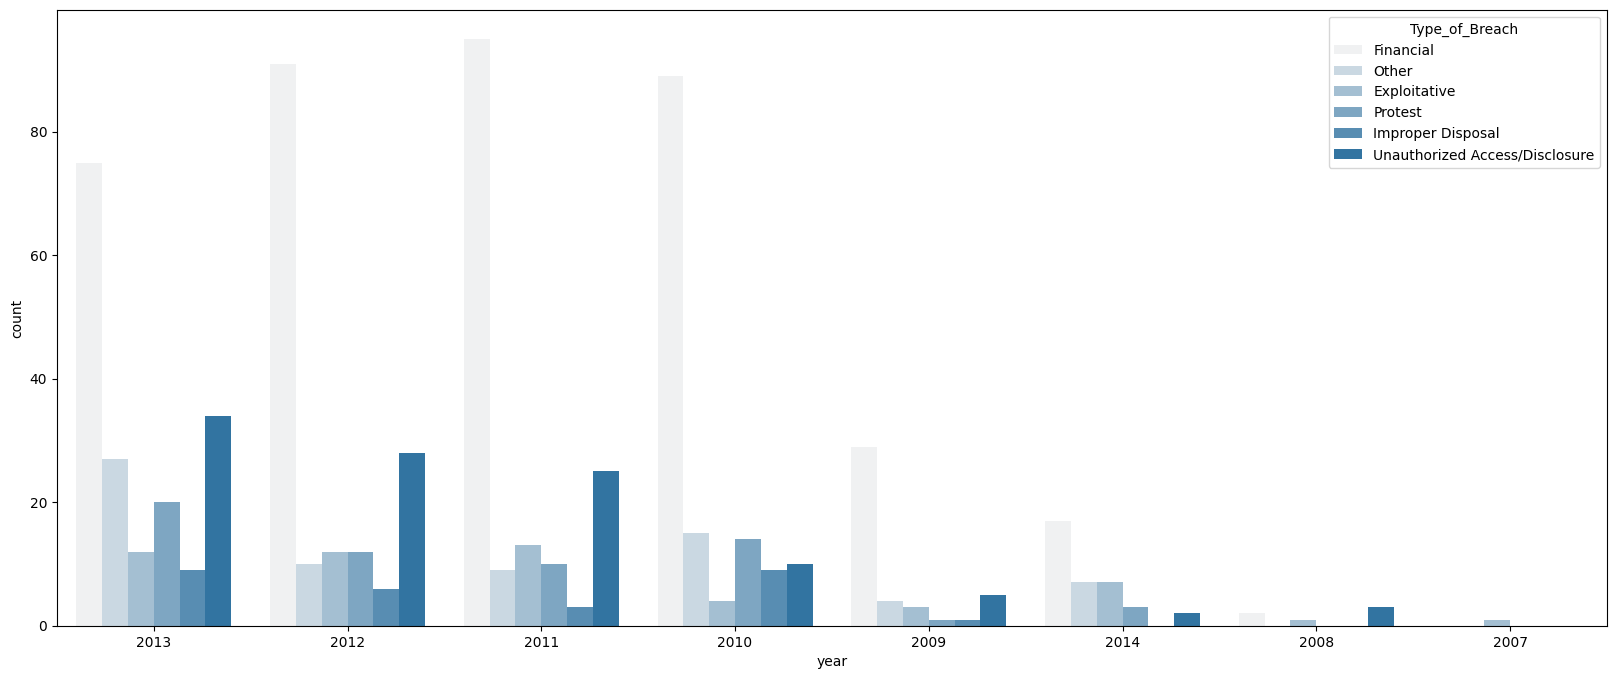

In [17]:
plt.figure(figsize=(20,8))
sb.countplot(data = df, x = 'year', hue = 'Type_of_Breach',color=base_color,order=year_order);

In [18]:
ct_counts = df.groupby(['Type_of_Breach', 'year']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'Type_of_Breach', columns = 'year', values = 'count')
ct_counts.head()

year,2007,2008,2009,2010,2011,2012,2013,2014
Type_of_Breach,,,,,,,,
Exploitative,1.0,1.0,3.0,4.0,13.0,12.0,12.0,7.0
Financial,NaN,2.0,29.0,89.0,95.0,91.0,75.0,17.0
Improper Disposal,NaN,NaN,1.0,9.0,3.0,6.0,9.0,NaN
Other,NaN,NaN,4.0,15.0,9.0,10.0,27.0,7.0
Protest,NaN,NaN,1.0,14.0,10.0,12.0,20.0,3.0


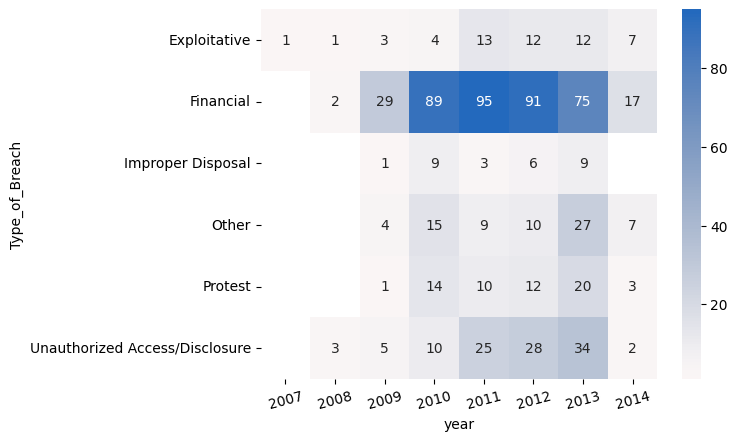

In [19]:
sb.heatmap(ct_counts, annot = True, cmap = 'vlag_r', center = 0)
plt.xticks(rotation=15);

### It appears that the number of attacks increases with time in general.

## Multivariate

Are year, attack, and state related?

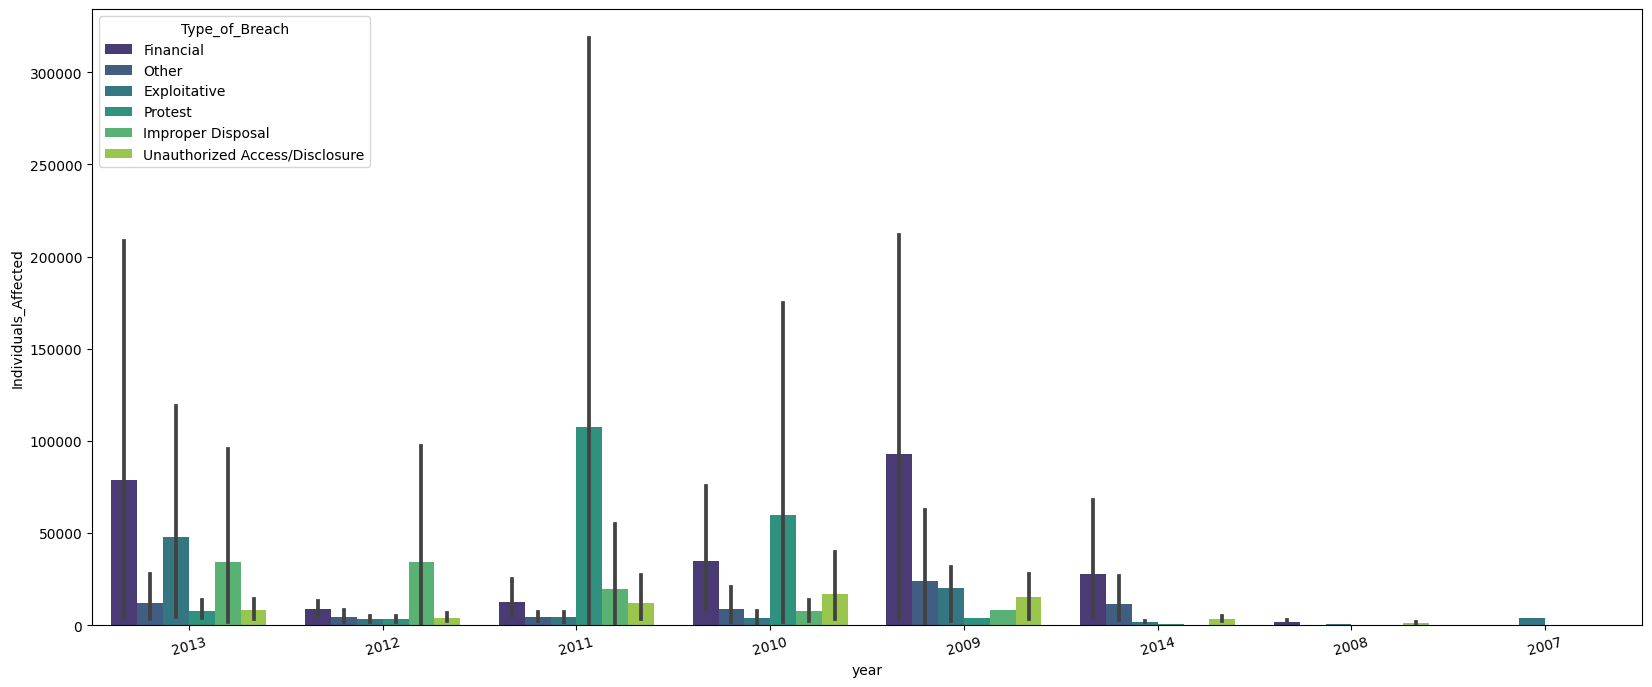

In [20]:
plt.figure(figsize=(20,8))
ax = sb.barplot(data = df, x = 'year', y = 'Individuals_Affected', 
                hue = 'Type_of_Breach',palette='viridis',order=year_order)
# ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Type_of_Breach')
plt.xticks(rotation=15);

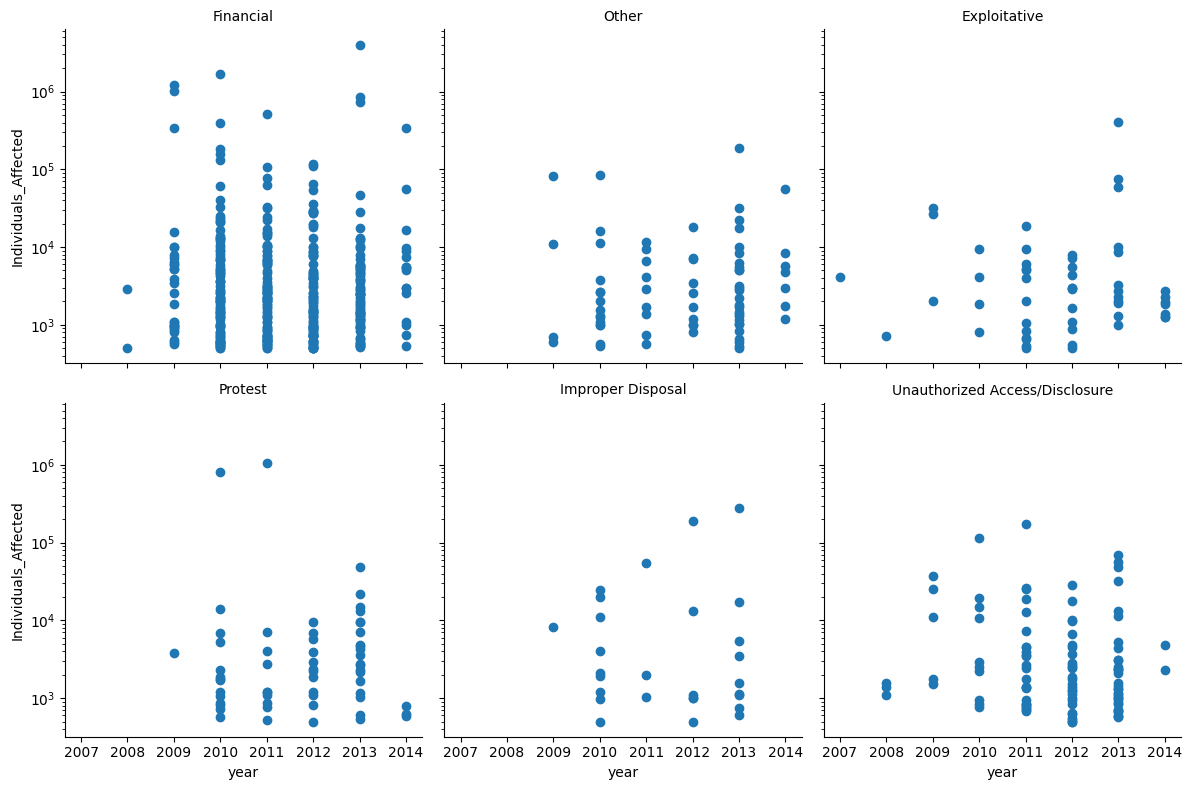

In [21]:
g = sb.FacetGrid(data = df, col = 'Type_of_Breach', height = 4,
                     col_wrap = 3)
g.map(plt.scatter,'year','Individuals_Affected');

g.set_ylabels('Individuals_Affected')
g.set_xlabels('year')
g.set_titles('{col_name}');
plt.yscale('log')

# Explain Phase

# US Cyber security breaches From 2007 To 2014
Main findings:
- **Theft** was the most frequent cyber-attack 
- **California** is the most reported cyber-attack state 
- **2013** is the most reported cyber-attack year 
- **2009-2013** is the period with high number of attacks, especially **Theft** as shown below
- Individuals affected by cyber-attacks is **increasing** each year year, However **2014** is exception.
-  Two types of attack are Theft is the cause of that increase! **Theft** and Hacking/IT incident.

### **Theft** was the most frequent cyber-attack in the period 2007-2014 as shown below:

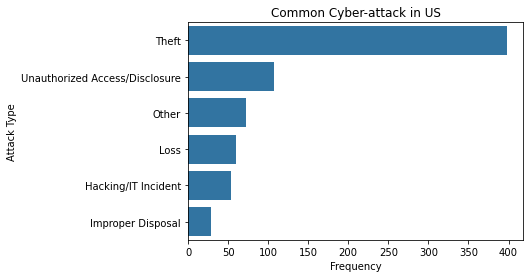

In [21]:
sb.countplot(data=df,y='Type_of_Breach',color=base_color,order=attack_order)
plt.title('Common Cyber-attack in US')
plt.xlabel('Frequency')
plt.ylabel('Attack Type');

### **California** is the most reported cyber-attack state in the period 2007-2014 as shown below:

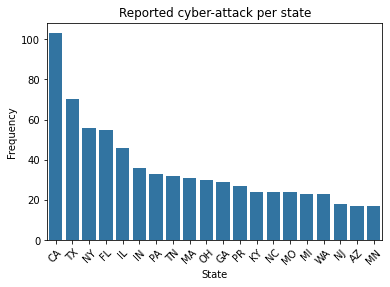

In [22]:
sb.countplot(data=df,x='State',color=base_color,order=state_order)
plt.xticks(rotation=45)
plt.title('Reported cyber-attack per state')
plt.xlabel('State')
plt.ylabel('Frequency');

### **2013** is the most reported cyber-attack year in the period 2007-2014 as shown below:

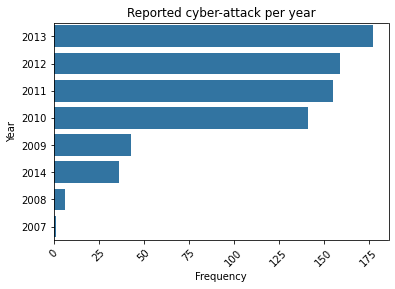

In [23]:
sb.countplot(data=df,y='year',color=base_color,order=year_order)
plt.xticks(rotation=45)
plt.title('Reported cyber-attack per year')
plt.xlabel('Frequency')
plt.ylabel('Year');

### Individuals affected by cyber-attacks is **increasing** each year year, However **2014** is exception, as shown below:

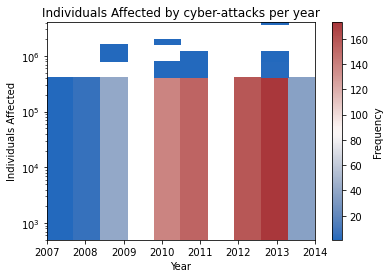

In [24]:
plt.hist2d(data = df, y = 'Individuals_Affected',x = 'year',cmin=0.1,cmap = 'vlag')
plt.colorbar(label='Frequency')
plt.title('Individuals Affected by cyber-attacks per year')
plt.xlabel('Year')
plt.ylabel('Individuals Affected')
plt.yscale('log');

### **2009-2013** is the period with high number of attacks, especially **Theft** as shown below:

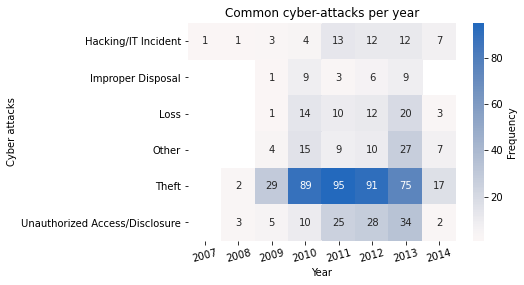

In [25]:
ct_counts = df.groupby(['Type_of_Breach', 'year']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'Type_of_Breach', columns = 'year', values = 'count')
sb.heatmap(ct_counts, annot = True, cmap = 'vlag_r', 
           center = 0,cbar_kws = {'label' : 'Frequency'})
plt.xticks(rotation=15)
plt.title('Common cyber-attacks per year')
plt.xlabel('Year')
plt.ylabel('Cyber attacks');

### Interstingly, two types of attack are  **Theft** is the cause of that increase! Theft and Hacking/IT incident.

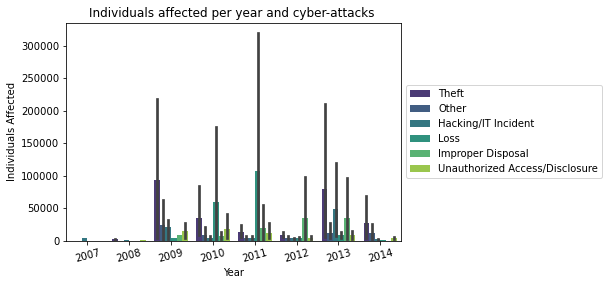

In [26]:
ax = sb.barplot(data = df, x = 'year', y = 'Individuals_Affected', 
                hue = 'Type_of_Breach',palette='viridis')
plt.xticks(rotation=15)
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.xticks(rotation = 15)
plt.title('Individuals affected per year and cyber-attacks ')
plt.xlabel('Year')
plt.ylabel('Individuals Affected');